## Objective of the notebook:

In this notebook, we explore the given customer order dataset and make some analysis and inferences. 

## Data dictionary  
  
There are two data samples provided as (gunzipped) CSV files.  
  
### Order data  
  
The order dataset contains the history of orders placed by customers acquired between 2015-03-01 and 2017-02-28. The data points were *synthetically* generated to reflect patterns of real data for the purpose of the exercise.  
  
The dataset columns definition:  

  
|Column|Description|  
|---|---|  
|*customer_id*|Unique customer ID.|  
|*order_date*|Local date of the order.|  
|*order_hour*|Local hour of the order.|  
|*customer_order_rank*|Number of a successful order counted in chronological order starting with 1 (an empty value would correspond to a failed order).|  
|*is_failed*|0 if the order succeeded.<br>1 if the order failed.|  
|*voucher_amount*|The discounted amount if a voucher (discount) was used at order's checkout.|  
|*delivery_fee*|Fee charged for the delivery of the order (if applicable).|  
|*amount_paid*|Total amount paid by the customer (the *voucher_amount* is already deducted and the *delivery_fee* is already added).|  
|*restaurant_id*|Unique restaurant ID.|  
|*city_id*|Unique city ID.|  
|*payment_id*|Identifies the payment method the customer has chosen (such as cash, credit card, PayPal, ...).|  
|*platform_id*|Identifies the platform the customer used to place the order (web, mobile app, mobile web, …).|  
|*transmission_id*|Identifies the method used to place the order to the restaurant (fax, email, phone, and different kinds of proprietary devices or point-of-sale systems).|  
  
The data rows are ordered by *customer_id* and *order_date*: all orders of one customer appear in chronological order on consecutive rows.  

### Labeled data  
  
The [labeled dataset](./data/machine_learning_challenge_labeled_data.csv.gz) flags whether the customers placed at least one order within 6 months after 2017-02-28 or not.  
  
The dataset columns definition:  
|Column|Description|  
|---|---|  
|*customer_id*|Unique customer ID.|  
|*is_returning_customer*|0 if the customer did not return (did not order again) in the 6 months after 2017-02-28.<br>1 if the customer returned (ordered again) at least once after 2017-02-28.|  
  
The data rows are ordered by *customer_id*.  

### Importing Libraries

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings("ignore") 
plt.style.use('bmh')

### Importing datasets

In [110]:
def read_data():
    print('Reading files...')    
    order_df = pd.read_csv('../input/machine_learning_challenge_order_data.csv')
    print('Order data has {} rows and {} columns'.format(order_df.shape[0], order_df.shape[1]))
    label_df = pd.read_csv('../input/machine_learning_challenge_labeled_data.csv')
    print('Label data has {} rows and {} columns'.format(label_df.shape[0], label_df.shape[1]))
    df = order_df.merge(label_df, on='customer_id')
    return df

df = read_data()

Reading files...
Order data has 786600 rows and 13 columns
Label data has 245455 rows and 2 columns


### Profile Report

In [3]:
profile = ProfileReport(df)
profile.to_file(output_file='output.html')
profile.to_widgets()

#### Warnings by pandas-profiling
- Dataset has 546 (0.1%) duplicate rows
- customer_id has a high cardinality: 245455 distinct values
- order_date has a high cardinality: 776 distinct values
- customer_order_rank has 24767 (3.1%) missing values
- voucher_amount is highly skewed (γ1 = 30.39394065)
- platform_id is highly skewed (γ1 = -22.53663783)
- voucher_amount has 743462 (94.5%) zeros
- delivery_fee has 597536 (76.0%) zeros

### Descriptive Analysis

In [112]:
df.describe()

order_hour  customer_order_rank      is_failed  voucher_amount  delivery_fee    amount_paid  restaurant_id        city_id     payment_id    platform_id  transmission_id  is_returning_customer
count  786600.000000        761833.000000  786600.000000   786600.000000  786600.00000  786600.000000   7.866000e+05  786600.000000  786600.000000  786600.000000    786600.000000          786600.000000
mean       17.588796             9.436810       0.031486        0.091489       0.18118      10.183271   1.628641e+08   47179.750497    1668.509077   29868.529382      4253.246112               0.519818
std         3.357192            17.772322       0.174628        0.479558       0.36971       5.618121   8.783082e+07   25904.630565      87.192665    1160.893265       572.855666               0.499607
min         0.000000             1.000000       0.000000        0.000000       0.00000       0.000000   7.349800e+04     230.000000    1491.000000     525.000000       212.000000               0.000000
25%        16.000000             1.000000       0.000000        0.000000       0.00000       6.648120   8.602350e+07   24799.000000    1619.000000   29463.000000      4228.000000               0.000000
50%        18.000000             3.000000       0.000000        0.000000       0.00000       9.027000   1.696135e+08   46467.000000    1619.000000   29815.000000      4324.000000               1.000000
75%        20.000000            10.000000       0.000000        0.000000       0.00000      12.213000   2.284335e+08   67886.000000    1779.000000   30231.000000      4356.000000               1.000000
max        23.000000           369.000000       1.000000       93.398900       9.86000    1131.030000   3.404535e+08  100205.000000    1811.000000   30423.000000     21124.000000               1.000000

In [134]:
pd.concat([df.count(), df.nunique(), df.isnull().sum(), round(100 * df.isnull().sum()/len(df), 2)],
              axis=1).rename(columns={0:'Count', 1:'Unique Value', 2:'Missing Value', 3:'Missing (%)'})

Count  Unique Value  Missing Value  Missing (%)
customer_id            786600        245455              0         0.00
order_date             786600           776              0         0.00
order_hour             786600            24              0         0.00
customer_order_rank    761833           369          24767         3.15
is_failed              786600             2              0         0.00
voucher_amount         786600           911              0         0.00
delivery_fee           786600            98              0         0.00
amount_paid            786600          6471              0         0.00
restaurant_id          786600         13569              0         0.00
city_id                786600          3749              0         0.00
payment_id             786600             5              0         0.00
platform_id            786600            14              0         0.00
transmission_id        786600            10              0         0.00
is_returning_customer  786600             2              0         0.00
demand                 786600             1              0         0.00
year                   786600             6              0         0.00
month                  786600            12              0         0.00
week                   786600            53              0         0.00
day                    786600            31              0         0.00
dayofweek              786600             7              0         0.00
is_weekend             786600             2              0         0.00

There are 786600 orders from 245455 customers (31.2%)

There are 24767 missing values in customer_order_rank (3.1%)

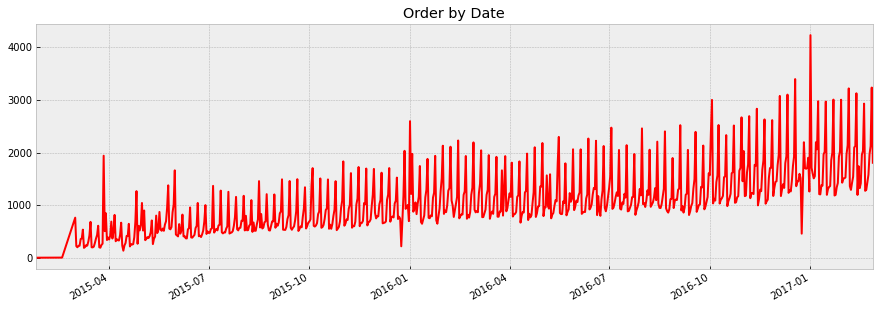

In [142]:
df[df.order_date>'2015-01'].groupby('order_date')['demand'].sum().plot(color='red', figsize=(15, 5),
                                    title='Order by Date')
plt.xlabel('')
plt.show()

In [137]:
df['demand'] = 1
df['order_date']=pd.to_datetime(df['order_date'])
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
df['week'] = df['order_date'].dt.week
df['day'] = df['order_date'].dt.day
df['dayofweek'] = df['order_date'].dt.dayofweek
df["is_weekend"] = df["dayofweek"].isin([5, 6]).astype(np.int8)

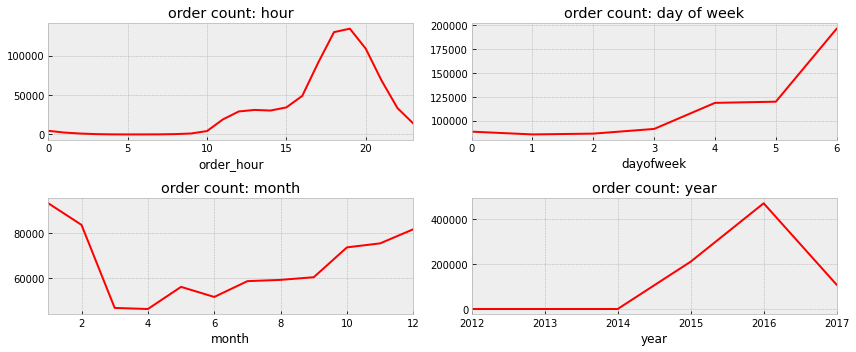

In [144]:
fig, [[ax0, ax1], [ax2, ax3]] = plt.subplots(2,2, figsize=(18, 5))


df.groupby('order_hour')['demand'].sum().plot(color='red', figsize=(12, 5), 
                                    title='order count: hour',ax=ax0)

df.groupby('dayofweek')['demand'].sum().plot(color='red', figsize=(12, 5),
                                    title='order count: day of week',ax=ax1)

df.groupby('month')['demand'].sum().plot(color='red', figsize=(12, 5),
                                    title='order count: month',ax=ax2)

df.groupby('year')['demand'].sum().plot(color='red', figsize=(12, 5),
                                    title='order count: year',ax=ax3)
plt.tight_layout()
plt.show()

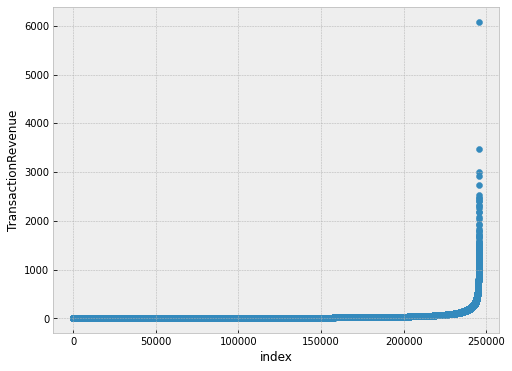

In [132]:
gdf = df.groupby("customer_id")["amount_paid"].sum().reset_index()

plt.figure(figsize=(8,6))
plt.scatter(range(gdf.shape[0]), np.sort(gdf["amount_paid"].values))
plt.xlabel('index', fontsize=12)
plt.ylabel('TransactionRevenue', fontsize=12)
plt.show()

### The 80/20 rule 

In [145]:
grouped_df = df.groupby('customer_id').last()

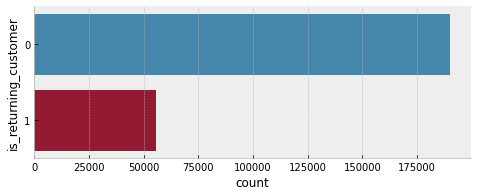

In [151]:
ax = sns.catplot(y="is_returning_customer", kind="count", data=grouped_df, height=2.6, aspect=2.5)